In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("C:/Users/sunny/Desktop/ML-NG/analyticsVidhya/Big-mart-sales/Train_UWu5bXk.csv")
df1 = pd.read_csv("C:/Users/sunny/Desktop/ML-NG/analyticsVidhya/Big-mart-sales/Test_u94Q5KV.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [3]:
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
df1['Item_Type_Combined'] = df1['Item_Identifier'].apply(lambda x: x[0:2])

#Rename them to more intuitive categories:
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':1,
                                                             'NC':2,
                                                             'DR':3})
df1['Item_Type_Combined'] = df1['Item_Type_Combined'].map({'FD':1,
                                                             'NC':2,
                                                             'DR':3})



In [4]:
al_data= pd.concat([df,df1],ignore_index=True)
Item_visibility_AVG = al_data.pivot_table(values = 'Item_Visibility', index = 'Item_Identifier')
df.Item_Visibility = np.where(df.Item_Visibility==0,Item_visibility_AVG[df.Item_Identifier],df.Item_Visibility)
df1.Item_Visibility = np.where(df1.Item_Visibility==0,Item_visibility_AVG[df1.Item_Identifier],df1.Item_Visibility)

df['Item_Visibility_MeanRatio'] = df.apply(lambda x: x['Item_Visibility']/Item_visibility_AVG[x['Item_Identifier']], axis=1)
df1['Item_Visibility_MeanRatio'] = df1.apply(lambda x: x['Item_Visibility']/Item_visibility_AVG[x['Item_Identifier']], axis=1)


In [5]:
Item_Weight_AVG = al_data.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')
df.Item_Weight = np.where(df.Item_Weight.isnull(),Item_Weight_AVG[df.Item_Identifier],df.Item_Weight)
df1.Item_Weight = np.where(df1.Item_Weight.isnull(),Item_Weight_AVG[df1.Item_Identifier],df1.Item_Weight)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
Item_Type_Combined           8523 non-null int64
Item_Visibility_MeanRatio    8523 non-null float64
dtypes: float64(5), int64(2), object(7)
memory usage: 932.3+ KB


C:\Users\sunny\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


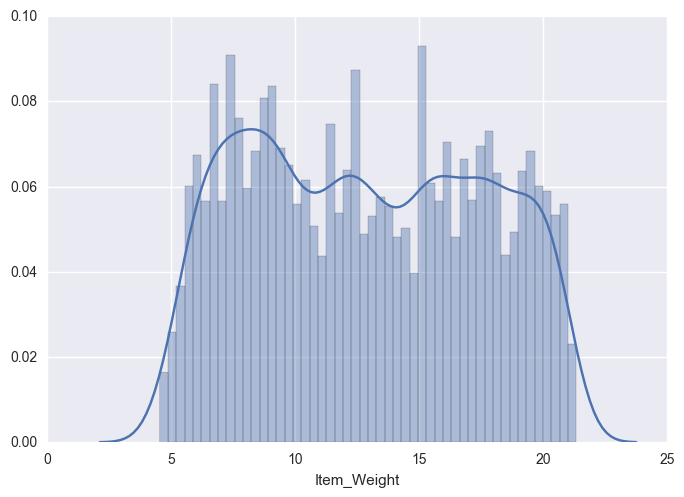

In [7]:
#working on Item_weight
df.Item_Weight=df.Item_Weight.fillna(0)
sns.distplot(df.Item_Weight,bins=50)
plt.show()

In [8]:
df.Item_Identifier.groupby(df.Item_Identifier).count()
#df[df.Item_Identifier=='DRA59'])

#Item_identifier,Item_weight_Item_dat_content_item_type are having 100 correlation(one to one mapping). So we will only have one attribute from them
X_train = df.drop(['Item_Type'],axis=1)
X_test  = df1.drop(['Item_Type'],axis=1)

In [9]:
mapping ={'LF':0,'Low Fat':0,'low fat':0,'Regular':1,'reg':1}
#X_train.Item_Fat_Content = X_train.Item_Fat_Content.apply(lambda x:mapping[x])
X_test.Item_Fat_Content = X_test.Item_Fat_Content.apply(lambda x:mapping[x])


In [10]:
#l_id=df.Item_Identifier.unique()
#for i in l_id:
#    t1=X_train.Item_Weight[X_train.Item_Identifier==i].max()
#    t2=X_test.Item_Weight[X_test.Item_Identifier==i].max()
#    X_train.Item_Weight[X_train.Item_Identifier==i]=X_train.Item_Weight[X_train.Item_Identifier==i].fillna(t1)
#    X_test.Item_Weight[X_test.Item_Identifier==i]=X_test.Item_Weight[X_test.Item_Identifier==i].fillna(t2)
#df.info()
#X_train.Item_Weight = X_train.Item_Weight.fillna(X_train.Item_Weight.mean())
#X_test.Item_Weight = X_test.Item_Weight.fillna(X_test.Item_Weight.mean())

In [11]:
#Creating new feature Old

X_train['old']=df.Outlet_Establishment_Year.max()-df.Outlet_Establishment_Year
X_test['old']=df.Outlet_Establishment_Year.max()-df1.Outlet_Establishment_Year

In [12]:
#X_train.Outlet_Location_Type.groupby(X_train.Outlet_Location_Type).count()
#X_train.Outlet_Location_Type = np.where(X_train.Outlet_Location_Type=='Tier 1',1,np.where(X_train.Outlet_Location_Type=='Tier 2',2,3))

In [13]:
#X_train.Outlet_Identifier.groupby(X_train.Outlet_Identifier).count()
X_train.Outlet_Size=X_train.Outlet_Size.fillna('N')
X_test.Outlet_Size=X_test.Outlet_Size.fillna('N')

In [14]:
import sklearn.preprocessing as pp
from sklearn.preprocessing import LabelEncoder 
combine = [X_train,X_test]
category = ['Outlet_Identifier','Outlet_Type','Outlet_Location_Type','Outlet_Size','Item_Fat_Content']
for dt in  combine:
    
    for f in category:
        lb = LabelEncoder()
        lb.fit(list(dt[f]))
        dt[f]=lb.transform(dt[f])       
    


In [15]:
#completion of outlet_size by logistic regression
import sklearn.linear_model as lm
LR = lm.LogisticRegression()
train_x = X_train.drop(['Item_Identifier', 'Item_Visibility', 'Item_MRP', 'Item_Weight','Item_Visibility_MeanRatio',
       'Outlet_Establishment_Year',  'Item_Outlet_Sales', 'old','Item_Fat_Content','Item_Type_Combined'],axis=1)
train_x = train_x[train_x.Outlet_Size!=2]
train_y = train_x['Outlet_Size']
train_x = train_x.drop(['Outlet_Size'],axis=1)
LR.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
train_x.columns

Index(['Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type'], dtype='object')

In [17]:
X_train.Outlet_Size=np.where(X_train.Outlet_Size==2,LR.predict(X_train[['Outlet_Identifier','Outlet_Location_Type','Outlet_Type']]),X_train.Outlet_Size)
X_test.Outlet_Size=np.where(X_test.Outlet_Size==2,LR.predict(X_test[['Outlet_Identifier','Outlet_Location_Type','Outlet_Type']]),X_test.Outlet_Size)

C:\Users\sunny\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


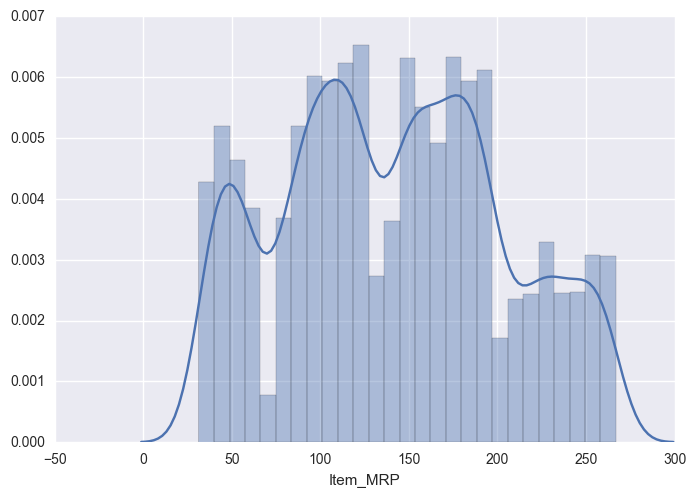

In [18]:
sns.distplot(X_train.Item_MRP)
plt.show()

In [19]:
Y_train = X_train['Item_Outlet_Sales']
X_test = X_test.drop(['Item_Identifier','Outlet_Establishment_Year'],axis=1)
X_train = X_train.drop(['Item_Identifier','Outlet_Establishment_Year','Item_Outlet_Sales'],axis=1)

In [20]:
X_train.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,Item_Visibility_MeanRatio,old
Item_Weight,1.000000,-0.022412,-0.019166,0.026172,-0.007568,-0.012690,0.002929,0.000298,-0.013401,-0.008857,0.012823
Item_Fat_Content,-0.022412,1.000000,0.036145,-0.000876,-0.002357,-0.004933,-0.004102,-0.004214,-0.302239,0.005795,0.000189
Item_Visibility,-0.019166,0.036145,1.000000,-0.004346,-0.098554,-0.016954,-0.030522,-0.173779,-0.056761,0.277279,0.075664
Item_MRP,0.026172,-0.000876,-0.004346,1.000000,0.003319,0.002151,0.000232,-0.001975,-0.043510,-0.014009,-0.005020
Outlet_Identifier,-0.007568,-0.002357,-0.098554,0.003319,1.000000,0.439922,-0.716176,0.099873,-0.001919,-0.317633,-0.079035
Outlet_Size,-0.012690,-0.004933,-0.016954,0.002151,0.439922,1.000000,-0.613885,-0.230330,-0.000790,-0.072205,-0.356932
Outlet_Location_Type,0.002929,-0.004102,-0.030522,0.000232,-0.716176,-0.613885,1.000000,0.467219,-0.001300,-0.050819,0.089216
Outlet_Type,0.000298,-0.004214,-0.173779,-0.001975,0.099873,-0.230330,0.467219,1.000000,-0.011182,-0.496861,0.122304
Item_Type_Combined,-0.013401,-0.302239,-0.056761,-0.043510,-0.001919,-0.000790,-0.001300,-0.011182,1.000000,0.008218,-0.005837
Item_Visibility_MeanRatio,-0.008857,0.005795,0.277279,-0.014009,-0.317633,-0.072205,-0.050819,-0.496861,0.008218,1.000000,0.245154


In [21]:
X_train.drop(['Item_Weight'],inplace=True,axis=1)
X_test.drop(['Item_Weight'],inplace=True,axis=1)

In [200]:
LR1 =lm.LinearRegression()
LR1.fit(X_train,Y_train)
Y_pred1 = LR1.predict(X_test)
np.savetxt('C:/Users/sunny/Desktop/ML-NG/analyticsVidhya/Big-mart-sales/pred9.csv', Y_pred1, delimiter=',')

In [201]:
LR2 =lm.Ridge()
LR1.fit(X_train,Y_train)
Y_pred2 = LR1.predict(X_test)
np.savetxt('C:/Users/sunny/Desktop/ML-NG/analyticsVidhya/Big-mart-sales/pred2.csv', Y_pred2, delimiter=',')

In [202]:
from sklearn.ensemble import GradientBoostingRegressor
gbm1 = GradientBoostingRegressor()
gbm1.fit(X_train,Y_train)
Y_pred3 = gbm1.predict(X_test)
np.savetxt('C:/Users/sunny/Desktop/ML-NG/analyticsVidhya/Big-mart-sales/gbm.csv', Y_pred3, delimiter=',')

In [203]:
from sklearn.svm import SVR
svm1 = SVR()
svm1.fit(X_train,Y_train)
Y_pred4 = svm1.predict(X_test)
np.savetxt('C:/Users/sunny/Desktop/ML-NG/analyticsVidhya/Big-mart-sales/pred3.csv', Y_pred4, delimiter=',')

In [204]:
import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [205]:
import xgboost as xgb
reg = xgb.XGBRegressor()
reg.fit(X_train,Y_train)
Y_pred5 = reg.predict(X_test)
np.savetxt('C:/Users/sunny/Desktop/ML-NG/analyticsVidhya/Big-mart-sales/pred10.csv', Y_pred5, delimiter=',')

In [206]:
from sklearn import neighbors
knn= neighbors.KNeighborsRegressor()
knn.fit(X_train,Y_train)
Y_pred6 = knn.predict(X_test)
np.savetxt('C:/Users/sunny/Desktop/ML-NG/analyticsVidhya/Big-mart-sales/pred13.csv', Y_pred6, delimiter=',')

In [207]:
from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor(n_estimators=100, oob_score=True,random_state=7, verbose=1)
RF.fit(X_train,Y_train)
Y_pred7 = RF.predict(X_test)
np.savetxt('C:/Users/sunny/Desktop/ML-NG/analyticsVidhya/Big-mart-sales/pred15.csv', Y_pred7, delimiter=',')

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [208]:
from sklearn.tree import DecisionTreeRegressor
alg3 = DecisionTreeRegressor()
alg3.fit(X_train,Y_train)
Y_pred8 = alg3.predict(X_test)
np.savetxt('C:/Users/sunny/Desktop/ML-NG/analyticsVidhya/Big-mart-sales/pred18.csv', Y_pred8, delimiter=',')

In [23]:
#from sklearn import tree
#tree.export_graphviz(alg3,out_file='C:/Users/sunny/Desktop/ML-NG/analyticsVidhya/Big-mart-sales/tree.dot')

In [25]:
Y_final = (Y_pred1+Y_pred2+Y_pred3+Y_pred5+Y_pred6+Y_pred7+Y_pred8)/7
np.savetxt('C:/Users/sunny/Desktop/ML-NG/analyticsVidhya/Big-mart-sales/stacking.csv', Y_final, delimiter=',')

NameError: name 'Y_pred1' is not defined

In [26]:
X_train.shape,X_test.shape

((8523, 10), (5681, 10))

In [22]:

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.utils import np_utils

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=10, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=200, batch_size=5, verbose=1)
estimator.fit(X_train.as_matrix(),Y_train.as_matrix())
Y_pred9 = estimator.predict(X_test.as_matrix())

Using TensorFlow backend.


Epoch 1/200
8523/8523 [==============================] - 6s - loss: 4619342.1257     
Epoch 2/200
8523/8523 [==============================] - 5s - loss: 1956529.5420     
Epoch 3/200
8523/8523 [==============================] - 5s - loss: 1938652.7551     
Epoch 4/200
8523/8523 [==============================] - 4s - loss: 1928827.3157     
Epoch 5/200
8523/8523 [==============================] - 3s - loss: 1919919.8069     
Epoch 6/200
8523/8523 [==============================] - 3s - loss: 1911291.7319     
Epoch 7/200
8523/8523 [==============================] - 3s - loss: 1903073.9943     
Epoch 8/200
8523/8523 [==============================] - 3s - loss: 1893983.2649     
Epoch 9/200
8523/8523 [==============================] - 3s - loss: 1885650.8375     
Epoch 10/200
8523/8523 [==============================] - 3s - loss: 1877135.3368     
Epoch 11/200
8523/8523 [==============================] - 3s - loss: 1868820.1901     
Epoch 12/200
8523/8523 [============================

In [23]:
np.savetxt('C:/Users/sunny/Desktop/ML-NG/analyticsVidhya/Big-mart-sales/stacking1.csv', Y_pred9, delimiter=',')